In [1]:
# act with actor critic on moon lander 

In [1]:
import gym
from gym import spaces
import numpy as np
import matplotlib.pyplot as plt
import pdb

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.distributions.normal import Normal

import sys
import time
from IPython.display import display, clear_output

from tqdm.auto import tqdm

from utils import ReturnTracker
from ac import ActorCritic
from sac import SoftActorCritic
from ac_op import ActorCriticOffPolicy
from asac import AttentionSoftActorCritic
from envs import OptimizationEnv

In [2]:
env = OptimizationEnv(reset_params=True)

/users/felix.wagner/.local/lib/python3.9/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [3]:
observation, info = env.reset()

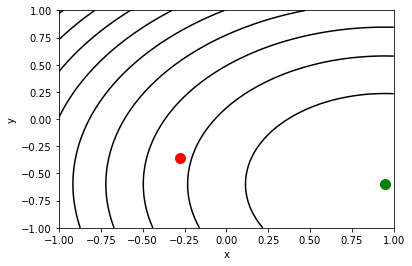

In [4]:
env.render()

In [6]:
agent = AttentionSoftActorCritic(env, lr=1e-2, gamma=.99, batch_size=64, gradient_steps=8,
                    device='cuda' if torch.cuda.is_available() else 'cpu')



In [8]:
tracker = ReturnTracker()



In [9]:
agent.learn(episodes=20,
            episode_steps=10, 
            two_pbars=False,
            tracker=tracker)



  0%|          | 0/20 [00:00<?, ?it/s]

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [ ]:
tracker.plot(smooth=1)


In [8]:
# test
while True:
    
    terminated, truncated = False, False
    
    agent.clear_context()
    
    state, info = env.reset(new_params=True)
    agent.add_context(state)
    
    env.render()
    
    steps = 0
    returns = 0
    
    while not terminated and not truncated:

        time.sleep(.05)
        clear_output(wait=True)

        action, _ = agent.predict()
        new_state, reward, terminated, truncated, info = env.step(action.flatten())
        agent.add_context(new_state)

        steps += 1
        state = torch.tensor(new_state)
        returns += reward
        
        print('steps: {}, returns: {}'.format(steps, returns))
        print('terminated', terminated, reward, env.params['noise'])

        env.render()
        sys.stdout.flush()
        
        if steps > 10:
            break
    
    time.sleep(1.)

ValueError: operands could not be broadcast together with shapes (1,2) (4,) 